#### Arunim Malviya (DS6A-2006)

#### Comparing different architecture, LeNet, AlexNet, ResNet, VGGNet and GoogleNet

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [15]:
base_dir = r"E:\Soyabean CNN\Soybean Leaf Dataset for Disease Classification"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)


Found 276 images belonging to 7 classes.
Found 69 images belonging to 7 classes.


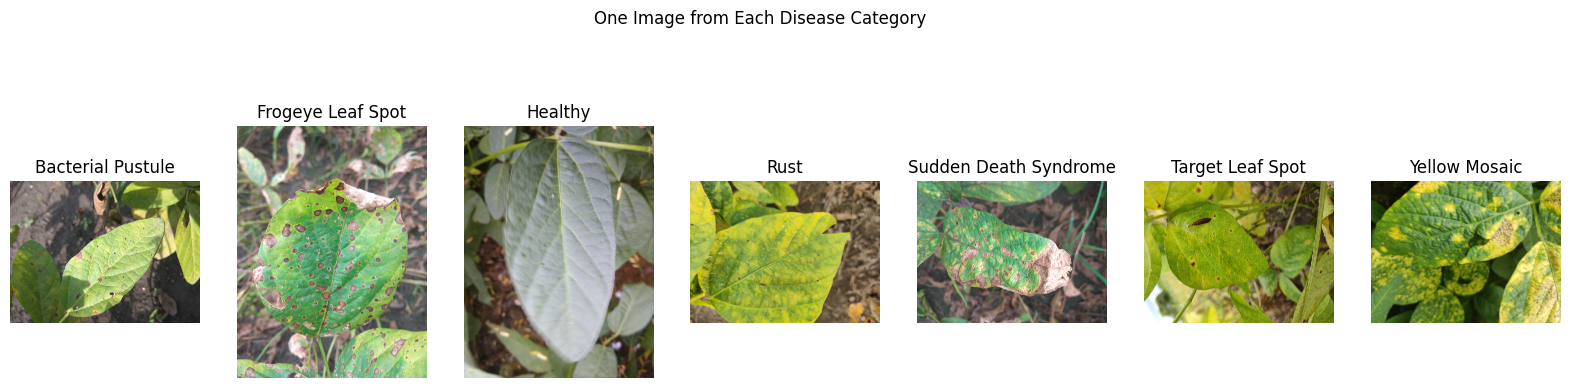

In [16]:

fig, axs = plt.subplots(1, 7, figsize=(20, 5)) 
fig.suptitle('One Image from Each Disease Category')

disease_categories = os.listdir(base_dir)

for i, category in enumerate(disease_categories):
    directory_path = os.path.join(base_dir, category)
    
    image_files = os.listdir(directory_path)
    image_path = os.path.join(directory_path, image_files[0])
    image = Image.open(image_path)

    axs[i].imshow(image)
    axs[i].axis('off')
    axs[i].set_title(category)

plt.show()


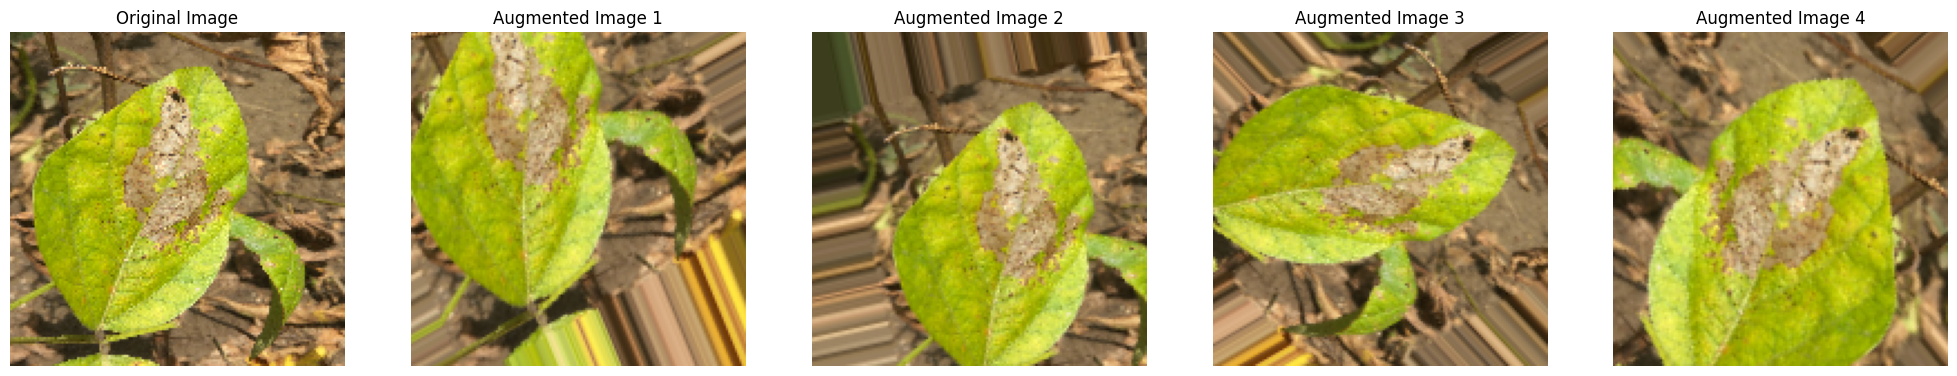

In [6]:

datagen = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

image_path = r"E:\Soyabean CNN\Soybean Leaf Dataset for Disease Classification\Rust\Rust (39).jpg"  

image = load_img(image_path, target_size=(150, 150))  
x = img_to_array(image)
x = x.reshape((1,) + x.shape)  

fig, axes = plt.subplots(1, 5, figsize=(25, 5))  
axes[0].imshow(image)  
axes[0].axis('off')
axes[0].set_title('Original Image')

it = datagen.flow(x, batch_size=1)
for i in range(1, 5):
    batch = next(it)
    axes[i].imshow(batch[0].astype('uint8'))  
    axes[i].axis('off')
    axes[i].set_title(f'Augmented Image {i}')

plt.show()


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    verbose=1)

### GoogleNet

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input, Concatenate

def inception_module(x, filters):
    conv1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    conv5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)    
    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_conv = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool)
    out = Concatenate(axis=-1)([conv1, conv3, conv5, pool_conv])
    return out

def create_googlenet(input_shape):
    input_layer = Input(shape=input_shape)

    # Initial Convolution and max pooling
    x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, filters=[64, 128, 32, 32])
    x = inception_module(x, filters=[128, 192, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, filters=[192, 208, 48, 64])
    x = inception_module(x, filters=[160, 224, 64, 64])
    x = inception_module(x, filters=[128, 256, 64, 64])
    x = inception_module(x, filters=[112, 288, 64, 64])
    x = inception_module(x, filters=[256, 320, 128, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, filters=[256, 320, 128, 128])
    x = inception_module(x, filters=[384, 384, 128, 128])

    # Final pooling and dense layers
    x = AveragePooling2D((7, 7), strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1000, activation='relu')(x)
    output_layer = Dense(7, activation='softmax')(x)

    model = Model(input_layer, output_layer)
    return model


In [20]:
model = create_googlenet(input_shape=(150, 150, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=early_stopping_callback  
)


Epoch 1/5
9/9 [==============================] - 264s 25s/step - loss: 41.8731 - accuracy: 0.1196 - val_loss: 1.9448 - val_accuracy: 0.1449
Epoch 2/5
9/9 [==============================] - 190s 20s/step - loss: 1.9533 - accuracy: 0.1449 - val_loss: 1.9457 - val_accuracy: 0.0725
Epoch 3/5
9/9 [==============================] - 193s 20s/step - loss: 1.9460 - accuracy: 0.1377 - val_loss: 1.9446 - val_accuracy: 0.1449
Epoch 4/5
9/9 [==============================] - 189s 20s/step - loss: 1.9517 - accuracy: 0.1630 - val_loss: 1.9549 - val_accuracy: 0.0580
Epoch 5/5
9/9 [==============================] - 198s 22s/step - loss: 1.9397 - accuracy: 0.1377 - val_loss: 1.8735 - val_accuracy: 0.1449


### AlexNet

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def create_alexnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape, padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # Output Layer
        Dense(num_classes, activation='softmax')
    ])
    return model


In [26]:
num_classes = 7
model = create_alexnet(input_shape=(150, 150, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
9/9 [==============================] - 161s 16s/step - loss: 5.1800 - accuracy: 0.1304 - val_loss: 2.0778 - val_accuracy: 0.1449
Epoch 2/5
9/9 [==============================] - 114s 13s/step - loss: 1.9061 - accuracy: 0.2609 - val_loss: 1.9128 - val_accuracy: 0.2319
Epoch 3/5
9/9 [==============================] - 118s 13s/step - loss: 1.8923 - accuracy: 0.2138 - val_loss: 1.8550 - val_accuracy: 0.2754
Epoch 4/5
9/9 [==============================] - 188s 21s/step - loss: 1.9380 - accuracy: 0.1739 - val_loss: 1.9536 - val_accuracy: 0.1449
Epoch 5/5
9/9 [==============================] - 140s 16s/step - loss: 1.9500 - accuracy: 0.1558 - val_loss: 1.9509 - val_accuracy: 0.1449


### LeNet

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def create_lenet(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    
    return model


In [28]:
num_classes = 7
model = create_lenet(input_shape=(150, 150, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
9/9 [==============================] - 145s 16s/step - loss: 2.1810 - accuracy: 0.2065 - val_loss: 1.8311 - val_accuracy: 0.2899
Epoch 2/5
9/9 [==============================] - 119s 13s/step - loss: 1.7566 - accuracy: 0.2862 - val_loss: 1.7445 - val_accuracy: 0.2899
Epoch 3/5
9/9 [==============================] - 109s 12s/step - loss: 1.6546 - accuracy: 0.3116 - val_loss: 1.7000 - val_accuracy: 0.3188
Epoch 4/5
9/9 [==============================] - 113s 13s/step - loss: 1.5535 - accuracy: 0.3478 - val_loss: 1.5930 - val_accuracy: 0.3768
Epoch 5/5
9/9 [==============================] - 113s 13s/step - loss: 1.5252 - accuracy: 0.3768 - val_loss: 1.5651 - val_accuracy: 0.3913


### ResNet

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

def create_resnet50(num_classes, input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


In [30]:
num_classes = 7  
model = create_resnet50(num_classes, input_shape=(150, 150, 3))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

94765736/94765736 [==============================] - 19s 0us/step
Epoch 1/5
9/9 [==============================] - 141s 15s/step - loss: 2.0282 - accuracy: 0.1232 - val_loss: 1.9523 - val_accuracy: 0.1449
Epoch 2/5
9/9 [==============================] - 116s 13s/step - loss: 1.9694 - accuracy: 0.0833 - val_loss: 1.9580 - val_accuracy: 0.1594
Epoch 3/5
9/9 [==============================] - 117s 13s/step - loss: 1.9603 - accuracy: 0.1413 - val_loss: 1.9459 - val_accuracy: 0.1449
Epoch 4/5
9/9 [==============================] - 106s 12s/step - loss: 1.9526 - accuracy: 0.1304 - val_loss: 1.9465 - val_accuracy: 0.1449
Epoch 5/5
9/9 [==============================] - 139s 15s/step - loss: 1.9473 - accuracy: 0.1341 - val_loss: 1.9442 - val_accuracy: 0.1449


### VGGNet

In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

def create_vgg16(num_classes, input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False
    
    x = Flatten()(base_model.output)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)    
    return model


In [32]:
num_classes = 7
model = create_vgg16(num_classes, input_shape=(150, 150, 3))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


58889256/58889256 [==============================] - 12s 0us/step
Epoch 1/5
9/9 [==============================] - 114s 12s/step - loss: 2.3181 - accuracy: 0.2754 - val_loss: 1.9509 - val_accuracy: 0.3478
Epoch 2/5
9/9 [==============================] - 64s 7s/step - loss: 1.5914 - accuracy: 0.4312 - val_loss: 1.3795 - val_accuracy: 0.4493
Epoch 3/5
9/9 [==============================] - 58s 7s/step - loss: 1.2011 - accuracy: 0.5000 - val_loss: 1.1553 - val_accuracy: 0.5652
Epoch 4/5
9/9 [==============================] - 58s 6s/step - loss: 1.0229 - accuracy: 0.6377 - val_loss: 0.9849 - val_accuracy: 0.6522
Epoch 5/5
9/9 [==============================] - 60s 7s/step - loss: 0.8233 - accuracy: 0.6957 - val_loss: 1.0339 - val_accuracy: 0.5652


### Ran model on only 5 epochs 
#### Accuracy using LeNet = val_loss: 1.5651 - val_accuracy: 0.3913
#### Accuracy using AlexNet = val_loss: 1.9509 - val_accuracy: 0.1449
#### Accuracy using ResNet = val_loss: 1.9442 - val_accuracy: 0.1449
#### Accuracy using GoogleNet = val_loss: 1.8735 - val_accuracy: 0.1449
#### Accuracy using VGGNet = val_loss: 1.0339 - val_accuracy: 0.5652

#### As we ran the model on only 5 epochs the accuracy is very low in every model, accuracy will improve if increase the epochs, change activation functions, use dropouts, use pooling and augment the data more. As for just a basic comparision i ran the model on only 5 epochs.